In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:
coplay = pd.read_csv("/mnt/data/ds_data/SHARED_RESOURCES/NETWORK_DATA_YEARS/Grouped_Jan2017-Feb2019.csv")
coplay_file = coplay.groupby(['SPA1','SPA2'])['BATTLE_CNT'].sum().reset_index()
coplay_file.head()

,SPA1,SPA2,BATTLE_CNT
0,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,0048E013B0F7958ACC52E538699ED1DE84D18E2B9620E9...,1
1,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,00DF9BA062D72A54D3C5688ED684078920922BC2583BA8...,1
2,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,0163ACCE4D7BA391CE6AF4610543DA424093A9B1AC3809...,1
3,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,0228B07CF15F38B83A42531AB6466F47D8029836AE520B...,1
4,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,03ED9339DF838206FE3788035FEB3CB864E37A56D2F943...,1


In [3]:
coplay_agg1 = coplay_file.groupby(['SPA1']).agg({"SPA2": "count"}).reset_index()
coplay_agg2 = coplay_file.groupby(['SPA2']).agg({"SPA1": "count"}).reset_index()
coplay_agg1.columns = ['SPA', 'Coplay_count'] 
coplay_agg2.columns = ['SPA', 'Coplay_count'] 
coplay_data = pd.concat([coplay_agg1, coplay_agg2]).groupby(["SPA"], as_index=False)["Coplay_count"].sum()
coplay_data.head()

,SPA,Coplay_count
0,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,66
1,00003C737E6C04AB485320F2EE39F3DEF153CA065B303F...,2
2,000057AAF844EE943845732F1E2C512BF0B26DBB2B70BD...,3
3,00008E03280B09D31452D8A5BACD54B565394A283EB34C...,41
4,0000BC1E957A5DE86D6742F0304DD12F6C5B53BEE1A67B...,5


In [4]:
survey_file = pd.read_csv("/mnt/data/ds_data/SHARED_RESOURCES/updated_second_batch.csv", encoding='latin-1')
survey_file = survey_file.iloc[:,[1,4,5,6,7,10]]
survey_file.shape
survey_file['month_id']= pd.to_datetime(survey_file['month_id'])
survey_file = survey_file.set_index('month_id')
survey_file = survey_file['2017-01-01':'2019-02-28']
survey_file.reset_index(drop=True, inplace=True)
survey_file = survey_file.groupby(['spa_key_sha256']).agg({"bttl_total_cnt": "sum", "bttl_wins_cnt": "sum","max_tier_used_mm": "max","global_rating": "max"})

In [5]:
#to be used later = 268,684 entries
join_features = survey_file.join(coplay_data.set_index('SPA'), on='spa_key_sha256')

coplay_mean = coplay_data['Coplay_count'].mean()
join_features['Coplay_count'] = join_features['Coplay_count'].fillna(coplay_mean)
join_features['Coplay_count'] = join_features['Coplay_count'].round()
join_features.reset_index(inplace=True)
join_features.head()

,spa_key_sha256,bttl_total_cnt,bttl_wins_cnt,max_tier_used_mm,global_rating,Coplay_count
0,00000714D508E2E8920AB7F66B9566D46172A02EA50BD7...,18,9,3,74,72.0
1,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,7460,3656,10,4574,66.0
2,000024EA5B64414688664675D362C6B609CF422AF4F2F3...,27,12,5,2421,72.0
3,0000290505D808A4E9F8829E118E1546DBF6FD65B7F502...,3,2,4,1235,72.0
4,00002A428C3F8EA6D46AC382DC935D41EBD8E578BCD5CB...,23,9,2,157,72.0


In [6]:
twinks_file = pd.read_csv("/mnt/data/ds_data/SHARED_RESOURCES/TWINK_DATA/twinks_new.csv")
twinks_file.head()

,Unnamed: 0,PARENT_SPA_KEY,PARENT_STARTED_AT,CHILD_SPA_KEY,CHILD_STARTED_AT,RANK_OF_CHILD
0,108,658CDFD65103B78226828BA1EF405150A3615CF13DE410...,26-JUN-15,55250E954219DDB757D7FBD9AFB6FBB249EFAF69E9DE4A...,06-JAN-16,1
1,112,75CEA7828759FE157E838A4E8EE64190876AC50257825B...,23-JUN-15,35FE10DE6F56666254FC45D7B86D3793780723F68F53B6...,02-NOV-15,1
2,125,50B6FBDF2EEAA03BFC48BCBEF2E9AF55E12B87808C8213...,16-JUL-15,3C9B848EDF94730F264F5154DC3DEEE52315DC654F9381...,17-JUL-15,1
3,204,918AB7B7929DEBA24B8996D4D8B52D8532C6A0FC77FDAC...,06-NOV-15,22F853DC155D2F35D5EC495FE8254CE27356D75105604A...,01-JAN-16,1
4,577,305E76BA82F34E1E987839FFD856112C4F6FB3F2B514F7...,24-JUN-15,2B6E46A6F6A46F7145A3E08A7D00CDB038F3DA1FC7D9B3...,27-JAN-17,3


In [7]:
twink_parent = twinks_file.iloc[:,[1]]
twink_parent = pd.DataFrame(twink_parent['PARENT_SPA_KEY'].drop_duplicates())
twink_child = twinks_file.iloc[:,[3]]
twink_child = pd.DataFrame(twink_child['CHILD_SPA_KEY'].drop_duplicates())
twink_pc = twink_parent.join(twink_child.set_index('CHILD_SPA_KEY'),how='outer', on='PARENT_SPA_KEY')
twink_pc['sybil_status'] = 1
twink_pc.shape

(390602, 2)

In [8]:
join_features = join_features.join(twink_pc.set_index('PARENT_SPA_KEY'), on='spa_key_sha256')
join_features['sybil_status'] = join_features['sybil_status'].fillna(0.0)

In [9]:
sha_removed_df = join_features.drop('spa_key_sha256',axis = 1)
sha_removed_df.head()

,bttl_total_cnt,bttl_wins_cnt,max_tier_used_mm,global_rating,Coplay_count,sybil_status
0,18,9,3,74,72.0,0.0
1,7460,3656,10,4574,66.0,1.0
2,27,12,5,2421,72.0,0.0
3,3,2,4,1235,72.0,0.0
4,23,9,2,157,72.0,0.0


In [11]:
from sklearn.model_selection import train_test_split

os = SMOTE(sampling_strategy='minority', random_state=4)
X_train, X_test, y_train, y_test = train_test_split(join_features.drop(['sybil_status','spa_key_sha256'],axis=1), 
           join_features['sybil_status'], test_size=0.30, 
            random_state=4)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['sybil_status'])
# we can Check the numbers of our data
print("before length of data is ",len(join_features.drop(['sybil_status','spa_key_sha256'],axis=1)))
print("after smote length of oversampled data is ",len(os_data_X))
print("Number of no sybil in oversampled data",len(os_data_y[os_data_y['sybil_status']==0]))
print("Number of sybil",len(os_data_y[os_data_y['sybil_status']==1]))
print("Proportion of no sybil data in oversampled data is ",len(os_data_y[os_data_y['sybil_status']==0])/len(os_data_X))
print("Proportion of sybil data in oversampled data is ",len(os_data_y[os_data_y['sybil_status']==1])/len(os_data_X))

before length of data is  1239146
after smote length of oversampled data is  1472732
Number of no sybil in oversampled data 736366
Number of sybil 736366
Proportion of no sybil data in oversampled data is  0.5
Proportion of sybil data in oversampled data is  0.5


In [12]:
os_data_X.head()

,bttl_total_cnt,bttl_wins_cnt,max_tier_used_mm,global_rating,Coplay_count
0,11.0,5.0,3.0,168.0,72.0
1,1804.0,848.0,8.0,2795.0,13.0
2,8.0,1.0,8.0,1239.0,72.0
3,597.0,278.0,6.0,2072.0,72.0
4,16.0,8.0,3.0,883.0,72.0


In [13]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(os_data_X, os_data_y.values.ravel())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#predictions
Predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions,digits=4))

              precision    recall  f1-score   support

         0.0     0.8986    0.6250    0.7372    315553
         1.0     0.2229    0.6042    0.3257     56191

    accuracy                         0.6218    371744
   macro avg     0.5608    0.6146    0.5314    371744
weighted avg     0.7965    0.6218    0.6750    371744



In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[197210 118343]
 [ 22243  33948]]


Feature: 0, Score: -0.00005
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.10843
Feature: 3, Score: 0.00014
Feature: 4, Score: 0.00029


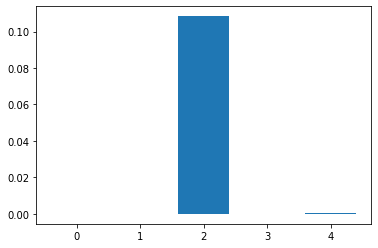

In [16]:
%matplotlib inline
#from matplotlib import pyplot
# get importance
importance = logmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scale = scaler.fit_transform(os_data_X)
Xtest_scale = scaler.transform(X_test)


In [18]:
import seaborn as sns
scaled_df = pd.DataFrame(Xtrain_scale, columns=['bttl_total_cnt', 'bttl_wins_cnt', 'max_tier_used_mm','global_rating','Coplay_count'])


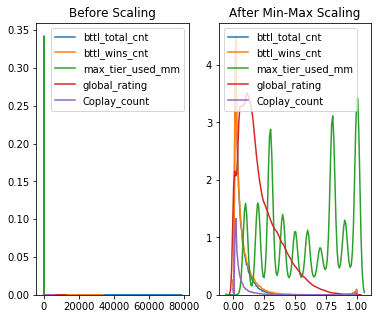

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(os_data_X['bttl_total_cnt'], ax=ax1)
sns.kdeplot(os_data_X['bttl_wins_cnt'], ax=ax1)
sns.kdeplot(os_data_X['max_tier_used_mm'], ax=ax1)
sns.kdeplot(os_data_X['global_rating'], ax=ax1)
sns.kdeplot(os_data_X['Coplay_count'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['bttl_total_cnt'], ax=ax2)
sns.kdeplot(scaled_df['bttl_wins_cnt'], ax=ax2)
sns.kdeplot(scaled_df['max_tier_used_mm'], ax=ax2)
sns.kdeplot(scaled_df['global_rating'], ax=ax2)
sns.kdeplot(scaled_df['Coplay_count'], ax=ax2)
plt.show()

In [20]:
#RANDOM FOREST
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Classifier
rand=RandomForestClassifier(n_estimators=100)

#Train the model
rand.fit(Xtrain_scale,os_data_y.values.ravel())

y_pred=rand.predict(Xtest_scale)

Feature: 0, Score: 0.17033
Feature: 1, Score: 0.17324
Feature: 2, Score: 0.32638
Feature: 3, Score: 0.26147
Feature: 4, Score: 0.06858


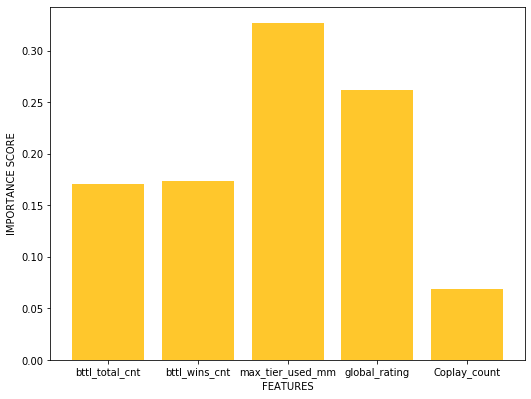

In [21]:
features = list(os_data_X.columns)
importance = rand.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(features, importance,color='#FFC72C')
plt.xlabel('FEATURES')
plt.ylabel('IMPORTANCE SCORE')
fig = plt.gcf()
fig.set_size_inches(8.5, 6.5,forward=True)
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

Root Mean Squared Error: 0.4544726224449056
